# This  dataset describe the cirmes happened in chicago

First, let's import some package for this project.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

After importing the packages, let's load the 'csv' file. 

In [2]:
data = pd.read_csv('chicago.csv')

By using the head() function, we can see that there are servals feature to describe the crime, such as the date, the location, the description of the crime, whether the crimal is arrested or not. We can also get a short glimpse about the dataset, we can see that the 'LOCATION' column is just the combine of 'LATITUDE' and 'LONGITUDE' column, and it also have some connection with 'X COORDINATE' and 'Y COORDINATE' column. The detail meaning of each columns can be seen in XXX.

In [4]:
data.head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JF156487,12/01/2021 12:01:00 AM,056XX N SPAULDING AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,N,N,1711,39.0,08A,NaN,NaN,NaN,NaN,NaN
1,JE362576,09/05/2021 02:47:00 PM,102XX S VERNON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,Y,511,9.0,14,1181052.0,1837198.0,41.708515,-87.612580,"(41.708514886, -87.61258026)"
2,JE364188,09/07/2021 01:00:00 AM,033XX W MAYPOLE AVE,0560,ASSAULT,SIMPLE,SIDEWALK,Y,N,1123,28.0,08A,1154061.0,1900783.0,41.883579,-87.709735,"(41.883578698, -87.709734846)"
3,JE364232,09/07/2021 02:26:00 AM,062XX S UNION AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,N,N,711,16.0,14,1172637.0,1863365.0,41.780510,-87.642627,"(41.780509717, -87.642627358)"
4,JE369345,08/14/2021 06:20:00 AM,0000X W TERMINAL ST,0890,THEFT,FROM BUILDING,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,N,N,1651,41.0,06,1100317.0,1935229.0,41.979006,-87.906463,"(41.979006297, -87.906463155)"


By using the describe() function, we can see that there only 6 columns have the dtypes of 'int' or 'float', hence, we do need to change the dtypes of other columns to make it meaniful. Also, we can see that there are some null value in the dataset by comparing the count number from different columns.

In [5]:
data.describe()

,BEAT,WARD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE
count,206483.000000,206472.000000,2.033440e+05,2.033440e+05,203344.000000,203344.000000
mean,1148.800327,23.131611,1.165253e+06,1.885894e+06,41.842476,-87.669105
std,701.946570,13.985234,1.647935e+04,3.191952e+04,0.087783,0.059984
min,111.000000,1.000000,1.091242e+06,1.813909e+06,41.644608,-87.939733
25%,611.000000,9.000000,1.153551e+06,1.858271e+06,41.766325,-87.711625
50%,1024.000000,24.000000,1.167090e+06,1.891495e+06,41.857907,-87.662378
75%,1723.000000,34.000000,1.176847e+06,1.909105e+06,41.906432,-87.626643
max,2535.000000,50.000000,1.205119e+06,1.951499e+06,42.022537,-87.524529


By using the info() function, we can make sure that there are some missing values. If we look at the Dtype, we can alos see that there are some columns with object types, and that's not we want, so it need to be changed.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206483 entries, 0 to 206482
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CASE#                   206483 non-null  object 
 1   DATE  OF OCCURRENCE     206483 non-null  object 
 2   BLOCK                   206483 non-null  object 
 3    IUCR                   206483 non-null  object 
 4    PRIMARY DESCRIPTION    206483 non-null  object 
 5    SECONDARY DESCRIPTION  206483 non-null  object 
 6    LOCATION DESCRIPTION   205826 non-null  object 
 7   ARREST                  206483 non-null  object 
 8   DOMESTIC                206483 non-null  object 
 9   BEAT                    206483 non-null  int64  
 10  WARD                    206472 non-null  float64
 11  FBI CD                  206483 non-null  object 
 12  X COORDINATE            203344 non-null  float64
 13  Y COORDINATE            203344 non-null  float64
 14  LATITUDE            

Since the 'LOCATION','LONGITUDE','LATITUDE','X COORDINATE' AND 'Y COORDINATE' have the same NON-NULL Count, in this case, we choose the 'LOCATION' to see those null value. We can see that for those 5 columns, there are highly relvent, meaning that when there is one missing value in those 5 columns, the other 4 columns will also be null.

In [7]:
data[data['LOCATION'].isnull()]

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JF156487,12/01/2021 12:01:00 AM,056XX N SPAULDING AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,N,N,1711,39.0,08A,NaN,NaN,NaN,NaN,NaN
17,JE413628,10/16/2021 04:00:00 AM,047XX S HAMLIN AVE,0820,THEFT,$500 AND UNDER,ALLEY,N,N,821,14.0,06,NaN,NaN,NaN,NaN,NaN
18,JE281374,06/24/2021 05:27:00 PM,003XX N PEORIA,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),N,N,1214,27.0,06,NaN,NaN,NaN,NaN,NaN
28,JE184972,03/29/2021 03:30:00 PM,056XX N SPAULDING AVE,0890,THEFT,FROM BUILDING,APARTMENT,N,N,1711,39.0,06,NaN,NaN,NaN,NaN,NaN
44,JE366565,09/05/2021 06:35:00 PM,014XX W RANDOLPH ST,0870,THEFT,POCKET-PICKING,PARK PROPERTY,N,N,1224,27.0,06,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206361,JF153444,12/20/2021 09:00:00 AM,028XX N RIVERWALK DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,N,N,1432,32.0,11,NaN,NaN,NaN,NaN,NaN
206377,JF155433,12/10/2021 12:00:00 PM,039XX W MONROE ST,0560,ASSAULT,SIMPLE,RESIDENCE,N,N,1122,28.0,08A,NaN,NaN,NaN,NaN,NaN
206430,JF154717,11/24/2021 12:00:00 AM,087XX S RACINE AVE,1156,DECEPTIVE PRACTICE,ATTEMPT - FINANCIAL IDENTITY THEFT,RESIDENCE,N,N,2222,21.0,11,NaN,NaN,NaN,NaN,NaN
206434,JF111484,12/30/2021 04:00:00 PM,005XX S KOSTNER AVE,0325,ROBBERY,VEHICULAR HIJACKING,CONVENIENCE STORE,Y,N,1131,28.0,03,NaN,NaN,NaN,NaN,NaN


Also, we can see that for the missing value in 'WARD', although the value in 'WARD' are missing, but there are no other missing value, hence, if we want to drop the missing values, we need to drop all the missing values.

In [17]:
data[data['WARD'].isnull()].head()

,CASE#,DATE OF OCCURRENCE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
1660,JE492313,12/29/2021 05:30:00 PM,017XX W HOWARD ST,0460,BATTERY,SIMPLE,STREET,N,N,2422,NaN,08B,1163643.0,1950346.0,42.019386,-87.673147,"(42.019385566, -87.673147017)"
15389,JF100732,01/01/2022 10:00:00 AM,017XX W HOWARD ST,0281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,ALLEY,N,N,2422,NaN,02,1163643.0,1950346.0,42.019386,-87.673147,"(42.019385566, -87.673147017)"
26562,JF133579,02/04/2022 11:50:00 AM,017XX W HOWARD ST,2027,NARCOTICS,POSSESS - CRACK,STREET,Y,N,2422,NaN,18,1163643.0,1950346.0,42.019386,-87.673147,"(42.019385566, -87.673147017)"
61168,JE273377,06/18/2021 11:00:00 AM,081XX W BALMORAL AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,N,Y,1614,NaN,14,1120930.0,1934992.0,41.978049,-87.830661,"(41.978049035, -87.830660569)"
92988,JE247282,05/29/2021 08:45:00 PM,081XX W BALMORAL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,N,Y,1614,NaN,08B,1120930.0,1934992.0,41.978049,-87.830661,"(41.978049035, -87.830660569)"


Of course we can have different method to deal with the missing value, but since in this senario, the missing value are mainly about the location, it'll be hard and complicated to calculate a location value to replace the missng value, so let's just drop them.

In [19]:
data.dropna(inplace=True)

Right, let's deal with the date value, since in this case, the 'DATE OF OCCURRENCE' is a object, we first need to change it to datetime by using the pd.to_datetime() function. 

In [20]:
data['DATE  OF OCCURRENCE'] = pd.to_datetime(data['DATE  OF OCCURRENCE'])

In [8]:
data.columns

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

Hold on, before we do futher operation to the date data, why dont we rename the columns first, cause there are some space in the column and the column are in the uppercase, so before we continue with the date data, let's deal with the colmns first

In [21]:
new_data = data.copy()
new_data.rename(columns={'CASE#':'case_id','DATE  OF OCCURRENCE':'date','BLOCK':'block',
                        ' IUCR':'crime_code',' PRIMARY DESCRIPTION':'fisrt_de',' SECONDARY DESCRIPTION':'second_de',
                        ' LOCATION DESCRIPTION':'location','ARREST':'arrested','DOMESTIC':'domestic',
                        'BEAT':'beats_id','WARD':'ward','FBI CD':'fbi_cd','X COORDINATE':'x_co',
                        'Y COORDINATE':'y_co','LATITUDE':'latitude','LONGITUDE':'longitude','LOCATION':'real_loc'},inplace=True)

In [22]:
new_data.head()

,case_id,date,block,crime_code,fisrt_de,second_de,location,arrested,domestic,beats_id,ward,fbi_cd,x_co,y_co,latitude,longitude,real_loc
1,JE362576,2021-09-05 14:47:00,102XX S VERNON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,N,Y,511,9.0,14,1181052.0,1837198.0,41.708515,-87.612580,"(41.708514886, -87.61258026)"
2,JE364188,2021-09-07 01:00:00,033XX W MAYPOLE AVE,0560,ASSAULT,SIMPLE,SIDEWALK,Y,N,1123,28.0,08A,1154061.0,1900783.0,41.883579,-87.709735,"(41.883578698, -87.709734846)"
3,JE364232,2021-09-07 02:26:00,062XX S UNION AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,N,N,711,16.0,14,1172637.0,1863365.0,41.780510,-87.642627,"(41.780509717, -87.642627358)"
4,JE369345,2021-08-14 06:20:00,0000X W TERMINAL ST,0890,THEFT,FROM BUILDING,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,N,N,1651,41.0,06,1100317.0,1935229.0,41.979006,-87.906463,"(41.979006297, -87.906463155)"
5,JE364509,2021-09-07 10:45:00,014XX S SAWYER AVE,0460,BATTERY,SIMPLE,SIDEWALK,N,N,1022,24.0,08B,1154927.0,1892961.0,41.862097,-87.706764,"(41.862096997, -87.706764478)"


After the rename, we get a copy of data named new_data as the data we deal with later, in this phase, we can use the dt.XXX function to get year/month/week or other thing we need.

In [23]:
new_data['year'] = new_data.date.dt.year
new_data['month'] = new_data.date.dt.month
new_data['week'] = new_data.date.dt.week
new_data['woy'] = new_data.date.dt.weekofyear
new_data['dow'] = new_data.date.dt.dayofweek
new_data['hour'] = new_data.date.dt.hour

/var/folders/ms/sw2xn92n7jv5f5l4jntz4ml40000gn/T/ipykernel_15931/1394589128.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  new_data['week'] = new_data.date.dt.week
/var/folders/ms/sw2xn92n7jv5f5l4jntz4ml40000gn/T/ipykernel_15931/1394589128.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  new_data['woy'] = new_data.date.dt.weekofyear


In this project, let's focus on the crime taken place in the 2021, if you wanna do this project not on a specific year but on a year slope, it's ok.

In [27]:
data_2021 = new_data[new_data.year==2021]

In this cell, I drop the 'x_co' and 'y_co', why? cause it is highly relevent to the 'location', futhermore, we use the heatmap to plot the correleation in the dataset by using the corr() function. As we can see, that thoes location feature are highly relevent, as well as the time feature. But, from the heat map, we can get some useful info, so let's keep going.

<AxesSubplot:>

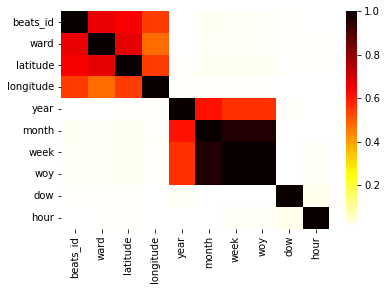

In [25]:
heatma = new_data.drop(columns=['x_co','y_co'])
sns.heatmap(heatma.corr().abs(),cmap='hot_r')

In this cell, we group the data by its location and sort them with the dscending.

In [30]:
location = data_2021.groupby('location').count().sort_values(by='case_id',ascending=False).iloc[:,1]

let's inspect the raw data, the there 123 different lcoation in the field with most of them taken place in the STREET, also we can see that there are bunch place with only 1 crime happened.

In [31]:
location

location
STREET                                    45310
APARTMENT                                 37140
RESIDENCE                                 25690
SIDEWALK                                  10658
PARKING LOT / GARAGE (NON RESIDENTIAL)     5701
                                          ...  
VEHICLE - COMMERCIAL: TROLLEY BUS             1
MOTEL                                         1
SCHOOL YARD                                   1
CHA PARKING LOT                               1
HOSPITAL                                      1
Name: date, Length: 123, dtype: int64

In this cell we are selecting the feature in the location where there are more than 105 cases happened, but why 105? cause it's the median of the location is nearly 90, choosing the 105 is just personal perferfecne. With the feature we filter, we will get 2 datasets, the data_over_105 which is the data that the location of the crime happened more than 105 times, and data_under_105 which is the data that the location of crime have less than 105 times.

In [231]:
feature_over_105 = list(location.loc[location>=105].index)
feature_under_105 = [x for x in loc.index if x not in feature_over_105]
data_over_105 = data_2021.loc[new_data.location.isin(feature_over_105)]
data_under_105 = data_2021.loc[new_data.location.isin(feature_under_105)]

Now, is time for the plot, let's focus on the data_over_105. The following figures are the hists about the logitude and latitude, from the figures, we can see that for the logitude, the crime are mostly centered in the -87.7 to -87.6, as for the latitude, the data are centered at around -41.7 to -41.8 and -41.85 to -41.95. Also, we noticed that on the longitude, there may be some outliner around -87.9, or it represente some special place in Chicago, but either way, in the following step, they will not be consider.

<AxesSubplot:xlabel='latitude'>

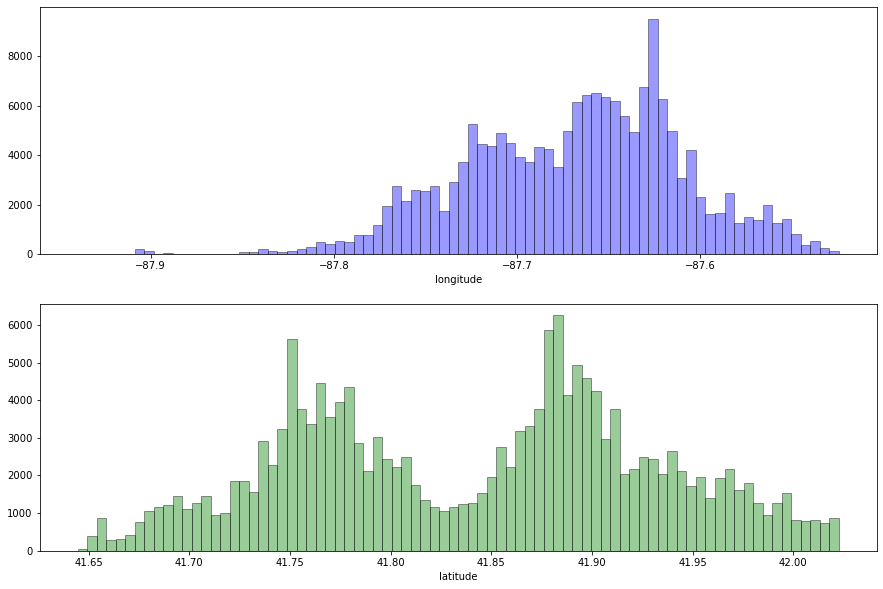

In [37]:
fig,axe = plt.subplots(nrows=2,figsize=(15,10))
sns.distplot(data_over_105['longitude'],ax=axe[0],bins=80,hist_kws=dict(edgecolor='black'),color='b',
            label='longitude',kde=False)
sns.distplot(data_over_105['latitude'],ax=axe[1],bins=80,hist_kws=dict(edgecolor='black'),color='g',
            label='latitude',kde=False)

Here we just make copies of data_over_105 and data_under_105 with data_more and data_less.

In [232]:
data_more = data_over_105.loc[data_over_105.hour==18].copy()
data_less = data_under_105.copy()
data_more.dropna(inplace=True)
data_less.dropna(inplace=True)

Here, we create 2 new columns base on the longitude and latitude for the futher operation.

In [569]:
data_more['new_lon'] = list(map(int,(data_more['longitude'].abs()-87.51)*10000))
data_more['new_la'] = list(map(int,(data_more['latitude']-41.64)*10000))

In this cell, we create a new dataframe by group the columns we create in the last cell, the purpose of this cell is to create a dataframe with only longitude, latitude and the count of the crimes happened in that place.

In [570]:
summ = pd.DataFrame(data_more.groupby(['new_lon','new_la'])['case_id'].count())
summ.reset_index(inplace=True)
summ.rename(columns={'case_id':'times'},inplace=True)

This function is how we plot a figure with the data in summ, where there are more than 50 cases happend it will be show on the map with red dot, and the cases under 50 but higher than 10 will painted in green dot, and less than 10 will be blue. This function return a 4300 * 3900 * 3 image which you can use imshow() to plot this image.

In [571]:
def plotimage(summary):
    rgb = np.zeros((4300,3900,3),dtype='uint8')
    lo_list = summary.iloc[:,0].unique()
    for point in lo_list:
        la_list = summary.loc[summary.iloc[:,0]==point].iloc[:,1].tolist()
        unit = summary.loc[summary.iloc[:,0]==point].iloc[:,2].tolist()
        for item in la_list:
            a = unit[la_list.index(item)]
            if a//50>0:
                rgb[item-5:item+5,point-5:point+5,0] = 255
                rgb[item-5:item+5,point-5:point+5,1] = 0
                rgb[item-5:item+5,point-5:point+5,2] = 0
            elif a//10>0:
                rgb[item-5:item+5,point-5:point+5,0] = 0
                rgb[item-5:item+5,point-5:point+5,1] = 255
                rgb[item-5:item+5,point-5:point+5,2] = 0
            else:
                rgb[item-5:item+5,point-5:point+5,0] = 0
                rgb[item-5:item+5,point-5:point+5,1] = 0
                rgb[item-5:item+5,point-5:point+5,2] = 255
    #rgb[0:200,0:2000,0]=255
    return rgb

From this cell, we can clearly see the scope of Chicago, the right side of the city is that famous lake. Mainly, there were crime happened everywhere is in the city, but most of them only occured less than 10 times, but the more left we go, we can see that the green dot and red dot are appeared. If we compare this image with the map, we can tell that around FULTON RIVER DISTRICT, there have the most green dot and red dot, which shows that there might be some 'situation'. Also, remember that most of crime were happended in the street, so we could also filter the data the the crime happened in the street and use the same method to plot them.
There are so many way to deal with the location info, but in this case, we just used on of them.

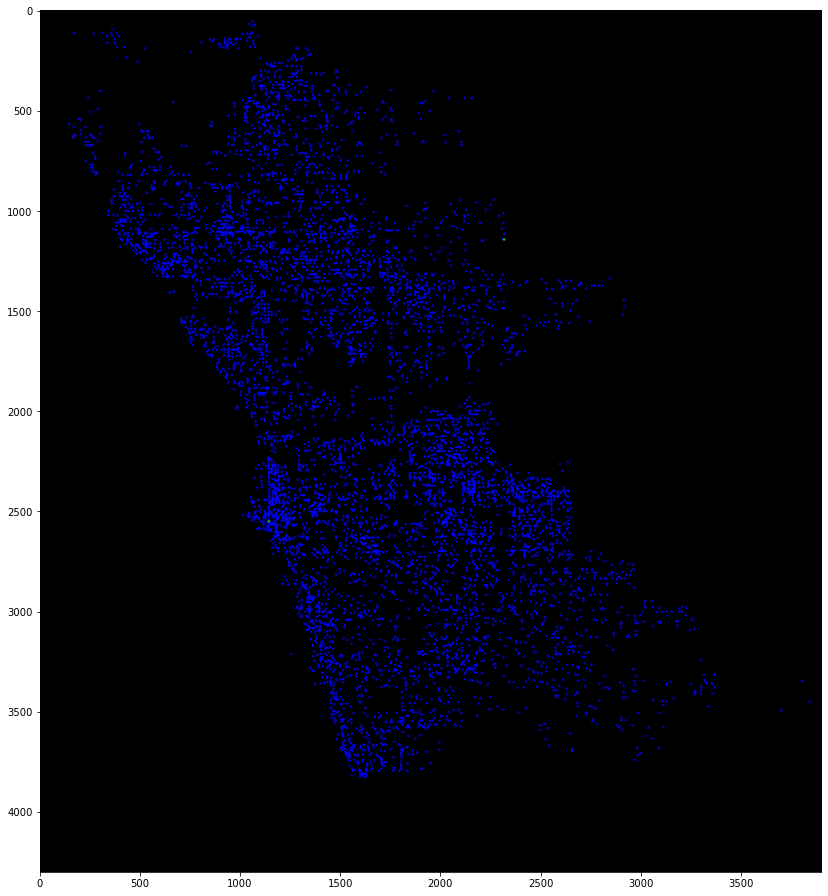

In [572]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(14,20))
ax.imshow(plotimage(summ),cmap='YlGnBu')

Now, let's foucs of the time, first with the week of year, we wanna see if there is any useful infomation in it. As we can see from the distplot that in some weeks, the numbers of crime kept going up such as the week 14 to week 24 and week 31 to week 39.

/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'crimes happened in which week of year')

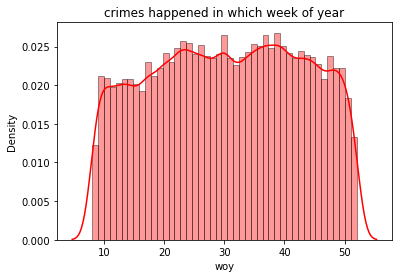

In [45]:
sns.distplot(data_2021['woy'],bins=45,hist_kws=dict(edgecolor='black'),color='red')
plt.title('crimes happened in which week of year')

Continue, with the hour, in this fig, we can get some useful info, like in the 0 o'clock, there were highest possiblity to occur a crime, and the possibility will go down as the time goes by until 6 o'clock that the possibility of crime will go up and will be steady around 10-11 o'clock. From the data we can also see that,in the midnight, the later the less possibility, but it doesnt mean that is safer, one possible reason could be there were less victim at that time. You can plot this fig with different type of crime.

/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'what time does a crime happened within a day')

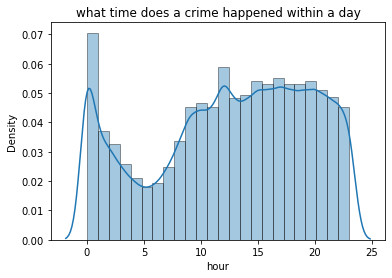

In [49]:
sns.distplot(data_2021['hour'],hist_kws=dict(edgecolor='black'),bins=24)
plt.title('what time does a crime happened within a day')

In this cell, we change the 'N' and 'Y' in the 'arrested' and 'domestic'into 0 and 1 for better understand, it could also be used for the supervised machine learning.

In [50]:
def changeN_Y_to_num(row):
    if row == 'N':
        return 0
    elif row == 'Y':
        return 1
data_2021['arrested'] = data_2021['arrested'].apply(changeN_Y_to_num)
data_2021['domestic'] = data_2021['domestic'].apply(changeN_Y_to_num)

/var/folders/ms/sw2xn92n7jv5f5l4jntz4ml40000gn/T/ipykernel_15931/1048377745.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['arrested'] = data_2021['arrested'].apply(changeN_Y_to_num)
/var/folders/ms/sw2xn92n7jv5f5l4jntz4ml40000gn/T/ipykernel_15931/1048377745.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['domestic'] = data_2021['domestic'].apply(changeN_Y_to_num)


In [51]:
data_2021.dtypes

case_id               object
date          datetime64[ns]
block                 object
crime_code            object
fisrt_de              object
second_de             object
location              object
arrested               int64
domestic               int64
beats_id               int64
ward                 float64
fbi_cd                object
x_co                 float64
y_co                 float64
latitude             float64
longitude            float64
real_loc              object
year                   int64
month                  int64
week                   int64
woy                    int64
dow                    int64
hour                   int64
dtype: object

Here, we group the data by the first depression, cause we wanna see which type of crime happened the most in 2021

In [53]:
data_depression = data_2021.groupby(['fisrt_de'])

Here we slect the top 50 type of crimes happened in 2021 and sored them as a.

In [54]:
a = data_depression['case_id'].count().sort_values(ascending=False)[:50]

This fig show the top 50 crimes and the number of them, as we can see that, the highest is battery with 35519 times in 2021, follow by theft which has 34942 times in 2021, these 2 type of crime have huge difference with the thrid crime, as an example, we will focus on the theft.

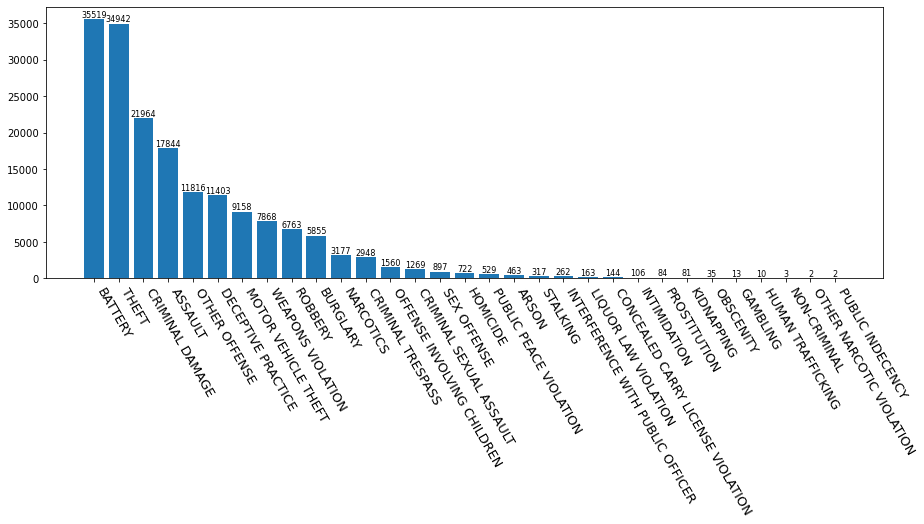

In [55]:
plt.figure(figsize=(15,5),edgecolor='black')
plt.bar(x=a.index,height=a.values)
plt.xticks(rotation=300,fontsize=13,va='top',ha='left')
for item, item1 in zip(a.index,a.values):
    plt.text(x=item,y=item1+1,s=item1,ha='center',va='bottom',fontsize=8)
plt.show()

Let's focus on the second depression with the first depression is theft, we can see that most of them are theft under 500$ and is nearly 3 times of retail theft, whichi we can tell most of theft is small-amount-theft.

Text(0.5, 1.0, 'detail about the crime of THEFT')

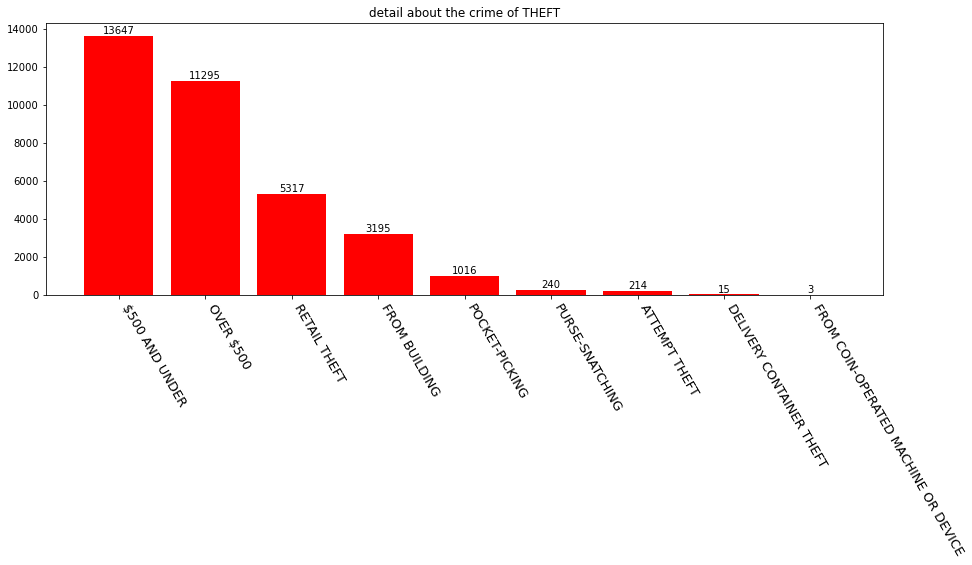

In [56]:
b = data_2021.loc[data_2021['fisrt_de']=='THEFT']['second_de'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(x=b.index,height=b.values,color='r')
plt.xticks(rotation=300,fontsize=13,va='top',ha='left')
for x,y in zip(b.index,b.values):
    plt.text(x,y+0.1,y,va='bottom',ha='center')
plt.title('detail about the crime of THEFT')
#b.values

Now, we obtain the data of theft in 2021

In [74]:
data_theft = data_2021.loc[data_2021['fisrt_de']=='THEFT'] 

This fig show that the number of each type of theft crimes within a day, we can see that puese-snatching have the highest number in 0 o'clock and just like the number of crime of all types within a day, they share almost the same shape, especially for the 'From BUILDING' and 'RETAIL THEFT', another interesting thing is that in the middle of the day, the number of '$500 under' are decreasing.

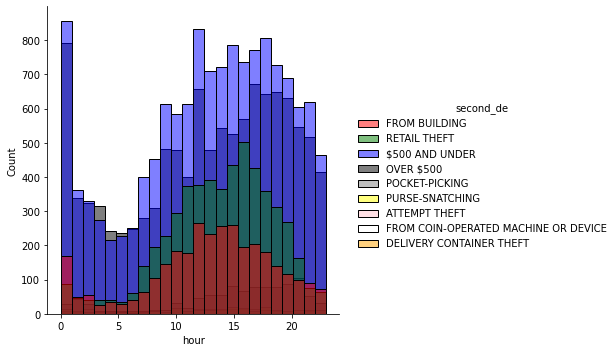

In [137]:
sns.displot(x='hour',bins=24,data=data_theft,hue='second_de',palette=['red','green','blue','black','grey','yellow','pink','white','orange'])

Also, we can see that the distribution of the theft crime with different longitude and latitude, which not a huge difference than the overwiew one.

/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bearpapa/miniforge3/envs/py38/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='latitude', ylabel='Density'>

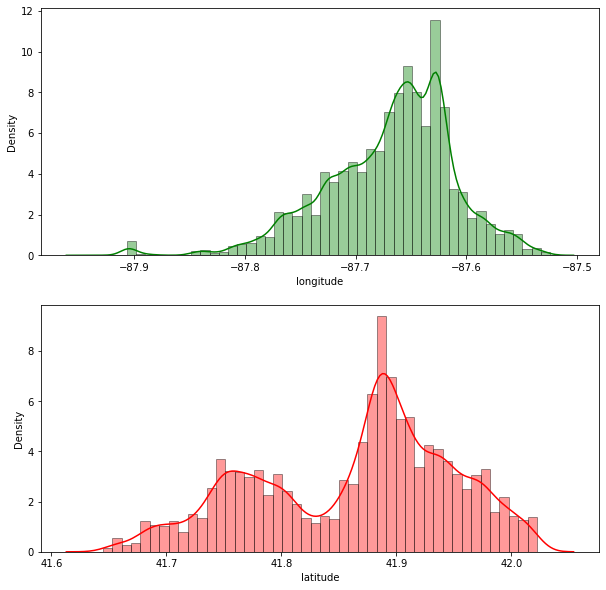

In [145]:
fig, axe = plt.subplots(nrows=2,figsize=(10,10))
sns.distplot(data_theft.longitude,ax=axe[0],hist_kws=dict(edgecolor='black'),color='green')
sns.distplot(data_theft.latitude,ax=axe[1],hist_kws=dict(edgecolor='black'),color='red')

Here, we choose 10 0'clock in the morning and plot them on the map, we can see that in 2021, for the theft, it spread out in the city, and in the center of the city it had more cases than the east side of the city.

In [227]:
summ_theft = data_theft.loc[data_theft.hour==10].copy()
def longitude_func(item):
    return int((abs(item)-87.51)*10000)
def latitude_func(item):
    return int((item-41.64)*10000)
summ_theft['latitude'] = summ_theft['latitude'].apply(latitude_func)
summ_theft['longitude'] = summ_theft['longitude'].apply(longitude_func)

In [228]:
theft = pd.DataFrame(summ_theft.groupby(['longitude','latitude'])['case_id'].count())
theft.reset_index(inplace=True)

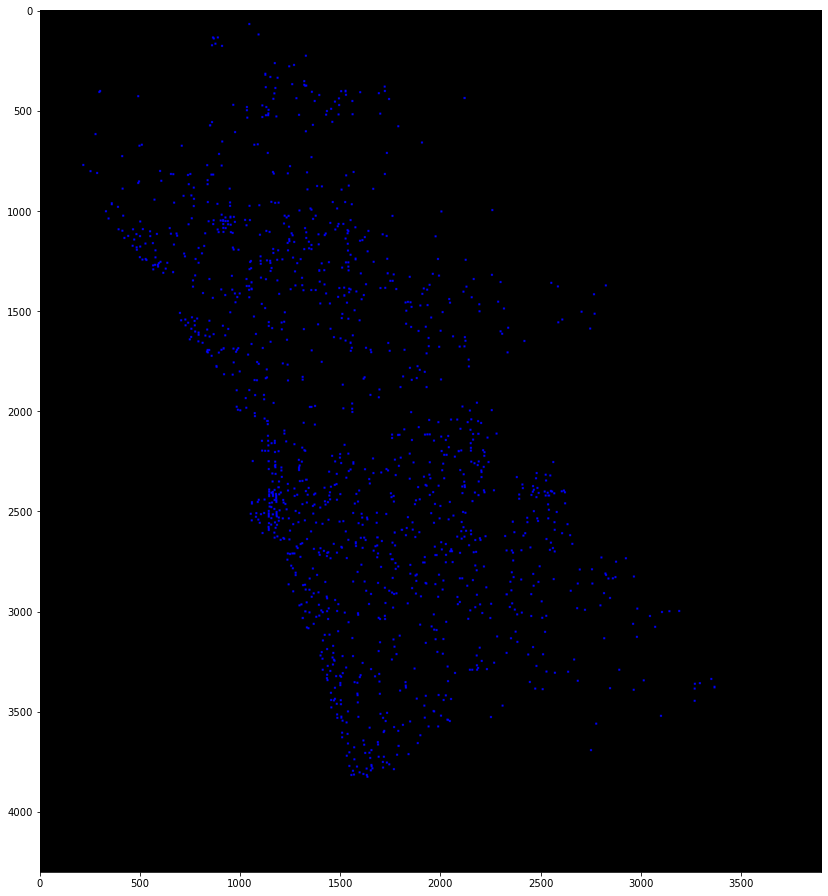

In [229]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(14,20))
ax.imshow(plotimage(theft))

Also, we can use a displot to check the frequency of theft in each day of week with different second drpression, we can see that mainly 4 kinds of crime happened where '$500 and under' happened the most.

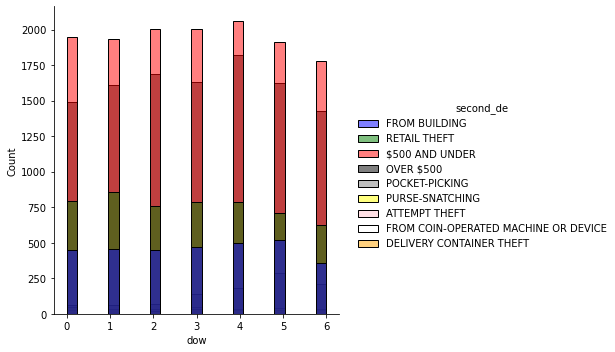

In [247]:
sns.displot(data=data_theft,x='dow',hue='second_de',palette=['blue','green','red','black','grey','yellow','pink','white','orange'])

Now, let's focus on the arrested rate for the theft. First we count the numebrs of case happened in each hour and group them by whether arrested or not.

In [460]:
arrest_count = data_theft.groupby(['hour','arrested'])['case_id'].count()

Then, we divide the data with the numbers of case happened in each hour

In [461]:
arrested_rate = arrest_count/arrest_count.groupby('hour').sum()

In [464]:
arrested_rate = pd.DataFrame(arrested_rate)
arrested_rate.reset_index(inplace=True)

Here we plot 2 figs which the one on the top is 

We can see that, for the theft, the arrest rate is average low, one possbility reason could be that when the police come, the crimals were already gone. Additionally, the arrest rate around 8 to 16 o'clock is higher than the others, maybe cause it would be hard for the crimal run away during the daytime.

Text(0, 0.5, 'Arrest rate')

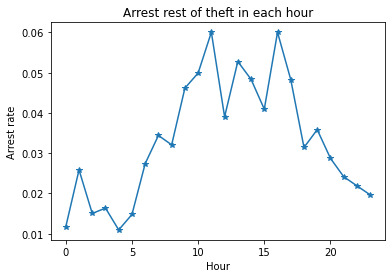

In [477]:
#plo.reset_index(inplace=True)
arrested_rate = pd.DataFrame(arrested_rate)
do_arrest = arrested_rate[arrested_rate.arrested==1]
plt.plot(do_arrest.hour,do_arrest.case_id,'*-')
plt.title('Arrest rest of theft in each hour')
plt.xlabel('Hour')
plt.ylabel('Arrest rate')

We also need to the combine the lineplot with the countplot to get a better explain. We can see that at 12 o'clock, although the arrest rate is low, cause at that time , there were also more cases of theft occured, but the number of arrested cases isn't going up, so the arrest rate went low.

<AxesSubplot:xlabel='hour', ylabel='count'>

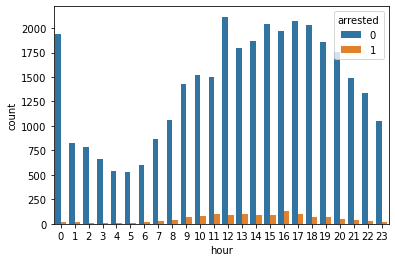

In [490]:
sns.countplot(data=data_theft,x=data_theft.hour, hue='arrested',)

We can see the arrest rate of other type of crime such as battery. Compare to theft, there more arrest cases happened, and also the arrest rate is higher than the theft, but still, not so much.

<AxesSubplot:xlabel='hour', ylabel='count'>

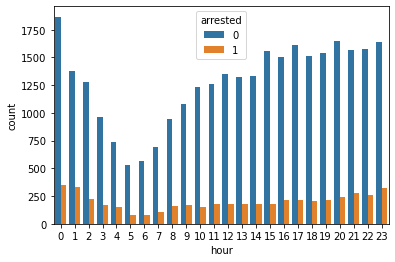

In [491]:
data_battery = data_2021[data_2021.fisrt_de=='BATTERY']
sns.countplot(data=data_battery,x='hour',hue='arrested')

We can also check the total arrest_rate with all types of crimes, but one thing need to be care, which is that the higer of the arrest_rate somtime may be meanless. The sample size also can affect the arrest rate a lot.

In [554]:
all_crime = data_2021.groupby(['fisrt_de'])['arrested']
df = pd.DataFrame(all_crime.sum())
df['sum'] = pd.DataFrame(all_crime.count())
df['arrest_rest'] = df.arrested/df['sum']
df.reset_index(inplace=True)
df.rename(columns={'fisrt_de':'first_de','arrested':'number of arrested',
                  'sum':'total number','arrest_rest':'arrest_rate'},inplace=True)

We can see that the 'PUBLIC INDECENCY' have 100% arrest rate, but since there were only 2 cases.

In [560]:
df.sort_values(by='arrest_rate',ascending=False)

,first_de,number of arrested,total number,arrest_rate
15,LIQUOR LAW VIOLATION,163,163,1.000000
24,PUBLIC INDECENCY,2,2,1.000000
23,PROSTITUTION,83,84,0.988095
4,CONCEALED CARRY LICENSE VIOLATION,139,144,0.965278
17,NARCOTICS,3062,3177,0.963802
9,GAMBLING,11,13,0.846154
12,INTERFERENCE WITH PUBLIC OFFICER,217,262,0.828244
19,OBSCENITY,24,35,0.685714
30,WEAPONS VIOLATION,4805,7868,0.610702
21,OTHER NARCOTIC VIOLATION,1,2,0.500000


We filter the crimes occured more than 300 times, and we can see that 'NARCOTICS' have the highest result with 96.38% and 'CRIMINAL DAMAGE' has the lowest which was only 3.37%

In [558]:
df[df['number of arrested']>300].sort_values(by='arrest_rate',ascending=False)

,first_de,number of arrested,total number,arrest_rate
17,NARCOTICS,3062,3177,0.963802
30,WEAPONS VIOLATION,4805,7868,0.610702
7,CRIMINAL TRESPASS,823,2948,0.279172
2,BATTERY,4820,35519,0.135702
22,OTHER OFFENSE,1240,11816,0.104942
1,ASSAULT,1554,17844,0.087088
26,ROBBERY,346,6763,0.051161
29,THEFT,1284,34942,0.036747
16,MOTOR VEHICLE THEFT,313,9158,0.034178
5,CRIMINAL DAMAGE,742,21964,0.033783


# Conclusion

This dataset describe the crime situation in Chicago in 2021, and based on that dataset we can get servals infos interesting.

First: The top 3 crimes of Chicago in 2021 is battery, theft and crimal damage, thoes 3 accounted for nearly 45.57% part of the total.

Second: The crime almost happened in every place in the Chicago, and in the west-mid part of Chicago, which might be 'FULTON RIVER DISTRICT', where have most cases happened.

Third: For all the crime, 0 o'clock is the most dangerous time casue at that time there have most cases, and the numbers of cases goes low until 6 o'clock in the morning and the number will goes up and keep steady.

Fourth: For the crime of THEFT, most of them are under $500 and the arrest rate is low, one possible reason is that is hard to catch the theft cause the characteristics of the THEFT.
Fifth: The crime of NARCOTICS has the highest arrest rate for all type of crime that occured more than 300 times, and the CRIMINAL DAMAGE is the lowest.

This project only show a small glimpse of the crime situation of Chicago, of course we have a lot of interesting left uncover, but some main ideas has already been introduced in the project.
Thanks for watching this!!!